In [557]:
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import stats
from seaborn import boxplot
import scipy as sp

$$ p(x) =\begin{cases}
  e^{-x}, & x \geq 0, \\
  0, & x < 0
\end{cases} $$

## Генерируем выборку

In [558]:
N = 25
sample = np.random.exponential(scale=1.0, size = N)
print(f'выборка: {sample}')

выборка: [0.62247348 0.11553721 0.6652274  0.17821413 0.75492187 0.42143375
 0.06744737 0.01266169 0.88245199 0.3154533  0.53840705 0.31792461
 1.97133207 4.45592019 0.25445611 2.76358351 0.10208545 0.21259089
 0.75252858 0.13985146 2.83656478 1.78369838 3.03313001 1.32737422
 1.60118296]


### а) Определить по выборке моду, медиану, размех, оценку коэффициета ассиметрии

In [559]:
def find_mode(variat):
    prev_x = -1
    mx = 1
    cnt = 1
    mode = np.array([], dtype=np.float64)
    for x in variat:
        if x == prev_x:
            cnt += 1
            if mx == cnt and x not in mode:
                mode = np.append(mode, x)
            elif mx < cnt:
                mx = cnt
                mode = np.array([x], dtype=np.float64)
        elif mx == 1:
            mode = np.append(mode, x)
        else:
            cnt = 1
        prev_x = x
    return mode

In [560]:
def muk(variat, k):
    return np.sum([(x_i - np.mean(variat))**k for x_i in variat]) / len(variat)

def find_asym_coef(variat):
    return muk(variat, 3) / muk(variat, 2) ** 1.5

In [561]:
variat = sorted(sample)
scope = variat[-1] - variat[0]
med = sample[N//2] if N % 2 == 1 else (sample[N//2+1] - sample[N//2]) / 2
mode = find_mode(sample)
q1, q2 = variat[N//4], variat[N//4*3]
gamma = find_asym_coef(variat)

print(f'вариационный ряд: {variat}\n\nразмах: {scope}\n\nмедиана: {med}\n'
      f'моды: {mode}\n\nлевый квартиль: {q1}, правый квартиль: {q2}\n\nкоэффицент асимметрии: {gamma}')


вариационный ряд: [np.float64(0.012661693865502942), np.float64(0.06744737078196267), np.float64(0.1020854499215604), np.float64(0.11553721248819075), np.float64(0.13985145705409469), np.float64(0.17821413223713864), np.float64(0.21259089279345658), np.float64(0.2544561057218088), np.float64(0.31545330385233444), np.float64(0.31792461158283125), np.float64(0.4214337453686753), np.float64(0.5384070548099356), np.float64(0.6224734753665463), np.float64(0.6652274002794111), np.float64(0.7525285825586643), np.float64(0.7549218667560041), np.float64(0.8824519874761065), np.float64(1.3273742162614313), np.float64(1.6011829585094848), np.float64(1.7836983823811245), np.float64(1.9713320717032046), np.float64(2.7635835114441134), np.float64(2.8365647799712335), np.float64(3.0331300138619994), np.float64(4.455920190281449)]

размах: 4.443258496415946

медиана: 1.9713320717032046
моды: [0.62247348 0.11553721 0.6652274  0.17821413 0.75492187 0.42143375
 0.06744737 0.01266169 0.88245199 0.3154533 

### б) построить эмпирическую функцию распределения, гистограмму и boxplot

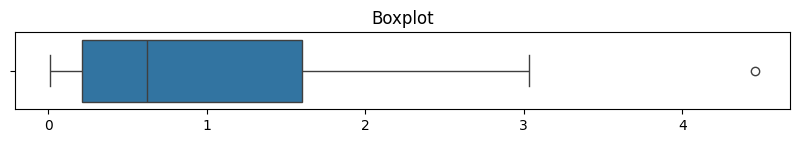

In [562]:
_, ax = plt.subplots(1, 1, figsize=(10, 1))
ax.set_title("Boxplot")
boxplot(x=variat)
plt.show()

C:\Users\123va\AppData\Local\Temp\ipykernel_25728\4257118150.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


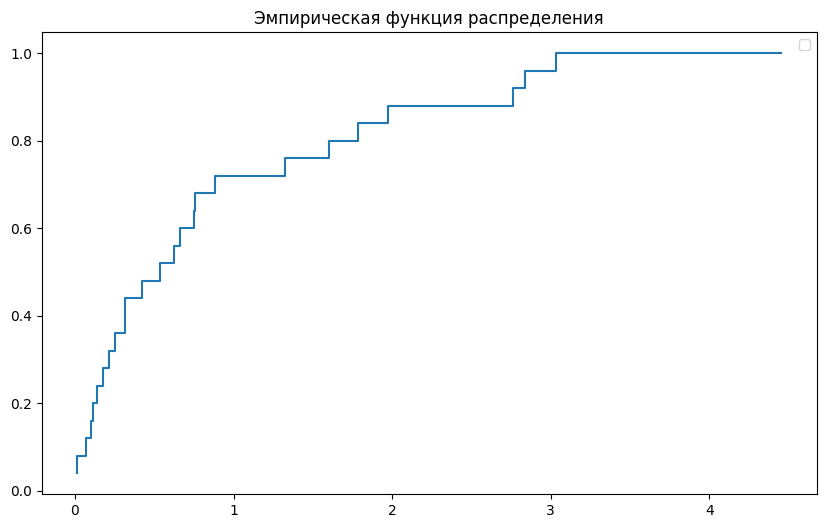

In [563]:
_, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.set_title("Эмпирическая функция распределения")

ax.step(variat, np.arange(1, N + 1) / N)

plt.legend()
plt.show()

C:\Users\123va\AppData\Local\Temp\ipykernel_25728\1650032361.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


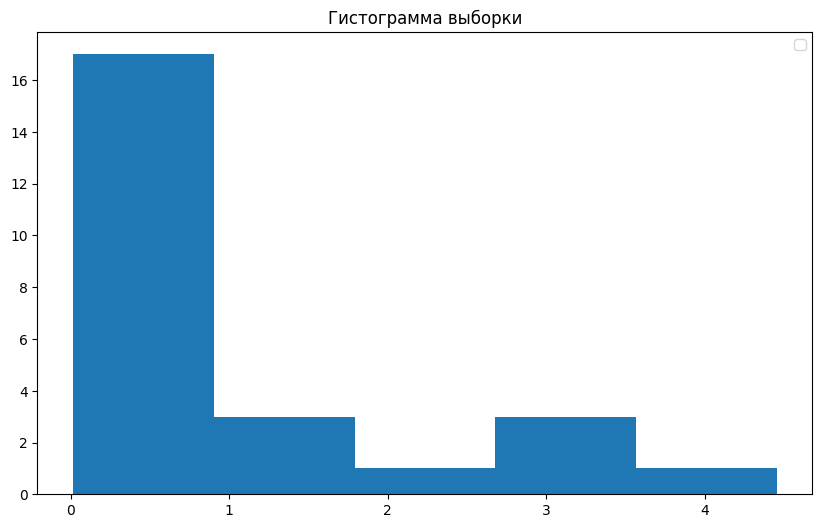

In [564]:
_, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.set_title("Гистограмма выборки")

ax.hist(variat, bins=int(1 + np.log2(N)))

plt.legend()
plt.show()

### c) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

![image](./T2(c).jpg)

In [565]:
btst_iter = 1000

mu = 1
sigma = 1/5
btst_sample = sample[np.random.choice(len(sample), size=(btst_iter, len(sample)))]
btst_mean = np.mean(btst_sample, axis=1)

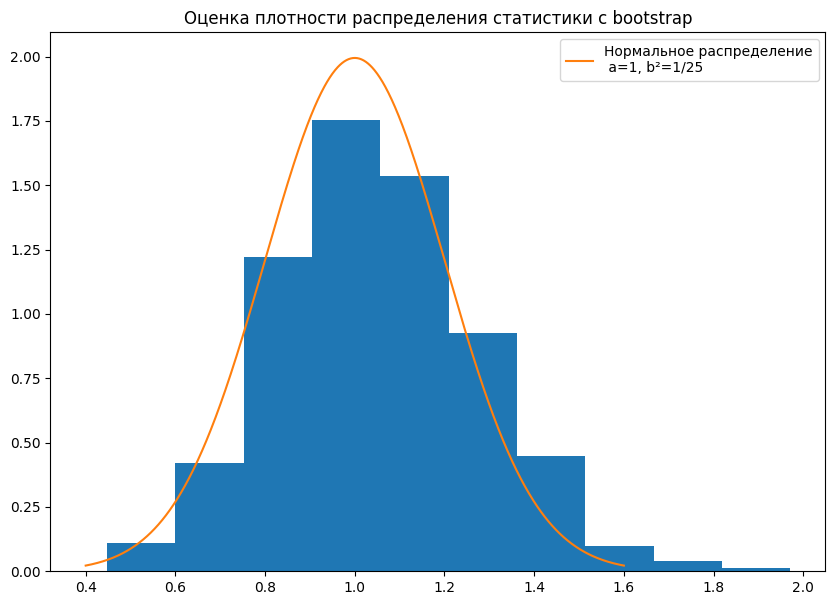

In [566]:
_, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_title("Оценка плотности распределения статистики с bootstrap")

ax.hist(btst_mean,
          bins=1+int(np.log2(btst_iter)),
          density=True)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
ax.plot(x, sp.stats.norm.pdf(x, mu, sigma),
         label="Нормальное распределение\n a=1, b²=1/25")

plt.legend()
plt.show()

### d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность тгого, что коэффициент асиммертии будет меньше 1

In [567]:
btst_skewness = []

for _ in range(btst_iter):
    btst_sample = np.random.choice(sample, size=len(sample))
    btst_skewness.append(find_asym_coef(btst_sample.tolist()))

prob_skew_less_than_1 = np.sum([1 if btst_skewness[i] < 1 
    else 0 for i in range(btst_iter)])/btst_iter
print(f'оценка, что коэффицент асимметрии будет < 1: {prob_skew_less_than_1}')

оценка, что коэффицент асимметрии будет < 1: 0.24


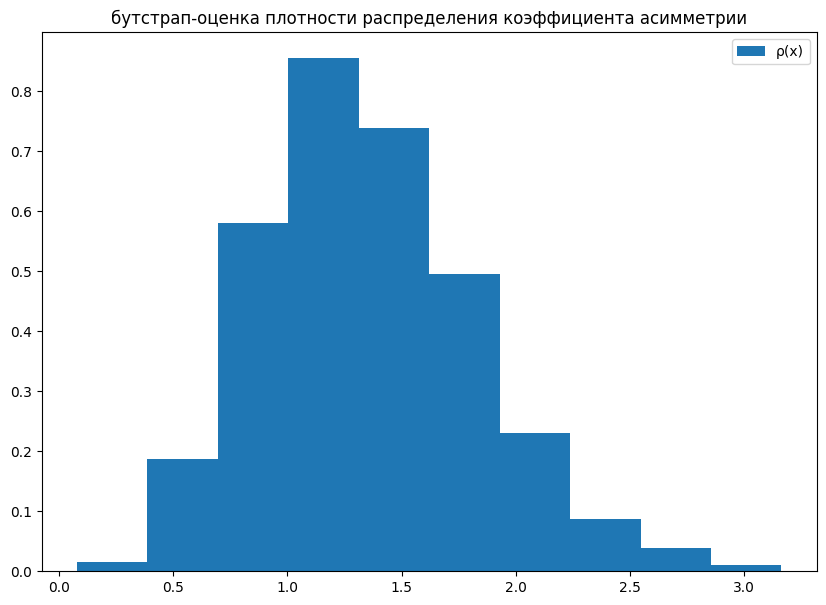

In [568]:
_, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_title("бутстрап-оценка плотности распределения коэффициента асимметрии")

ax.hist(btst_skewness,
          bins=1 + int(np.log2(btst_iter)),
          label="ρ(x)",
          density=True)

plt.legend()
plt.show()

### e) Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

In [569]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def Kappa(x):
    k = N // 2 + 1
    return N * p(x) * sp.special.comb(N - 1, k - 1) * ((1 - F(x)) ** (N - k)) * (F(x) ** (k - 1))

In [570]:
btst_med = []

for _ in range(btst_iter):
    btst_med.append(np.median(np.random.choice(sample,
                                                        size=len(sample),
                                                        replace=True)))

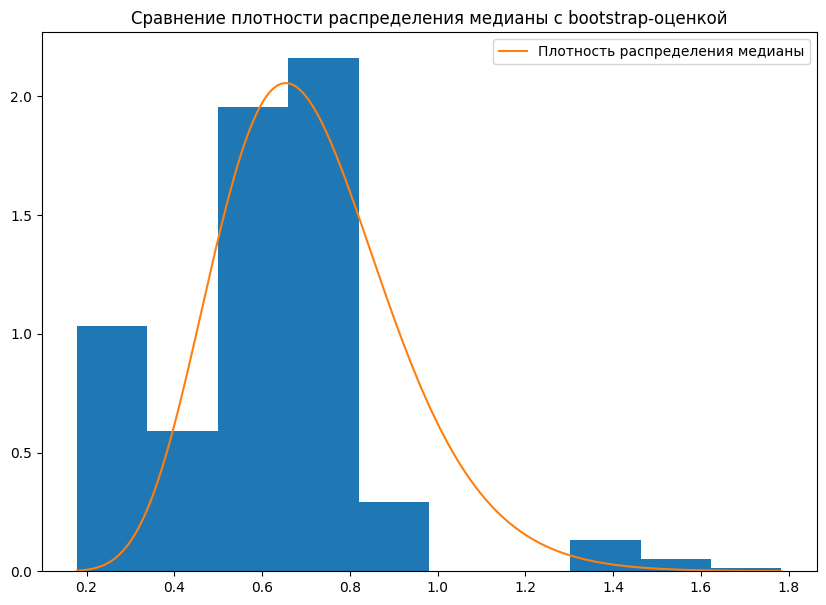

In [571]:
_, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_title("Сравнение плотности распределения медианы с bootstrap-оценкой")

ax.hist(btst_med,
         bins=int(1 + np.log2(btst_iter)),
         density=True)

x = np.linspace(min(btst_med),
                max(btst_med),
                btst_iter)
ax.plot(x,
         [Kappa(x_i) for x_i in x],
         label="Плотность распределения медианы")

plt.legend()
plt.show()